### Regression Analysis using Tf

In [6]:
# Input x: tf_x defined as a placeholder
# Input y: tf_y defined as a placeholder
# Model parameter w: weight defined as a variable
# Model parameter b: bias defined as a variable
# Model output y^: y_hat returned by Tf operations to compute the  prediction using the regression model

import tensorflow as tf
import numpy as np

g=tf.Graph()

with g.as_default():
    tf.set_random_seed(123)
    ## placeholders
    tf_x=tf.placeholder(shape=(None), dtype=tf.float32, name='tf_x')
    tf_y=tf.placeholder(shape=(None), dtype=tf.float32, name='tf_y')
    
    ## variables (model parameters)
    weight=tf.Variable(tf.random_normal(shape=(1,1), stddev=0.25),name='weight')
    bias=tf.Variable(0.0, name='bias')
    
    ## build the model
    y_hat=tf.add(weight*tf_x, bias, name='y_hat')
    
    ## Compute the cost
    cost=tf.reduce_mean(tf.square(tf_y-y_hat), name='cost')
    
    ## train the model
    optim=tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op=optim.minimize(cost, name='train_op')
    
    ## Saving the trained model
    saver=tf.train.Saver() 

In [7]:
## Creating random toy dataset for regression
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
def make_random_data():
    x=np.random.uniform(-2,4,size=200)
    y=[]
    for t in x:
        r=np.random.normal(loc=0.0,scale=(0.5+t*t/3),size=None)
        y.append(r)
    return x, 1.726*x-0.84+np.array(y)

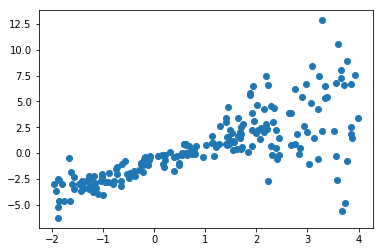

In [8]:
x, y=make_random_data()
plt.plot(x, y, 'o')

In [11]:
# train-test split
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

n_epochs = 500
training_costs = []

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    # train the model for n_epochs
    for e in range(n_epochs):
        c,_=sess.run([cost,train_op],feed_dict={tf_x:x_train, tf_y:y_train})
        training_costs.append(c)
        if not e%50:
            print('Epoch %4d: %.4f'%(e,c))
    saver.save(sess, './regress_model/trained-model')

Epoch    0: 12.2230
Epoch   50: 8.3876
Epoch  100: 6.5721
Epoch  150: 5.6844
Epoch  200: 5.2269
Epoch  250: 4.9725
Epoch  300: 4.8169
Epoch  350: 4.7119
Epoch  400: 4.6347
Epoch  450: 4.5742


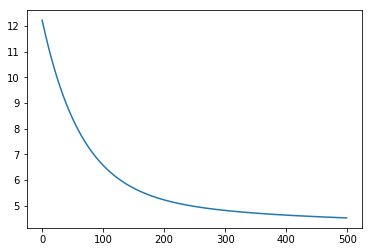

In [10]:
plt.plot(training_costs)

In [12]:
## Restoring saved model and running on test set
g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver=tf.train.import_meta_graph('./regress_model/trained-model.meta')
    new_saver.restore(sess, './regress_model/trained-model')
    y_pred=sess.run('y_hat:0', feed_dict={'tf_x:0':x_test})

INFO:tensorflow:Restoring parameters from ./regress_model/trained-model


In [13]:
## Visualizing the predictions
x_arr=np.arange(-2,4,0.1)

g2=tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver=tf.train.import_meta_graph('./regress_model/trained-model.meta')
    new_saver.restore(sess, './regress_model/trained-model')
    y_arr=sess.run('y_hat:0',feed_dict={'tf_x:0':x_arr})

INFO:tensorflow:Restoring parameters from ./regress_model/trained-model


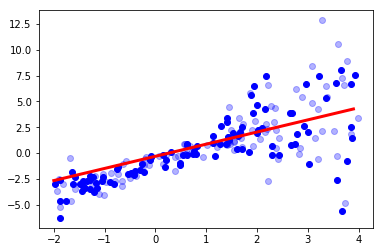

In [14]:
plt.figure()
plt.plot(x_train,y_train,'bo')
plt.plot(x_test,y_test,'bo',alpha=0.3)
plt.plot(x_arr,y_arr.T[:,0],'-r',lw=3)